In [95]:
import pandas as pd
import matplotlib.pyplot as plt

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import cohen_kappa_score

In [97]:
data = pd.read_csv('ORGANICS.csv',encoding="cp1251")

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 13 columns):
ID                 22223 non-null int64
DemAffl            21138 non-null float64
DemAge             20715 non-null float64
DemCluster         21549 non-null float64
DemClusterGroup    21549 non-null object
DemGender          19711 non-null object
DemReg             21758 non-null object
DemTVReg           21758 non-null object
PromClass          22223 non-null object
PromSpend          22223 non-null float64
PromTime           21942 non-null float64
TargetBuy          22223 non-null int64
TargetAmt          22223 non-null int64
dtypes: float64(5), int64(3), object(5)
memory usage: 2.2+ MB


In [99]:
data.shape

(22223, 13)

In [100]:
data.isnull().any().any()

True

In [101]:
data = data.fillna(data.mean())

In [102]:
x = data[['DemAffl',  'DemAge', 'DemCluster', 'PromSpend', 'PromTime']]

In [103]:
y = data['TargetBuy']

In [104]:
y = y.astype('int')

In [105]:
x

,DemAffl,DemAge,DemCluster,PromSpend,PromTime
0,10.0,76.0,16.0,16000.00,4.0
1,4.0,49.0,35.0,6000.00,5.0
2,5.0,70.0,27.0,0.02,8.0
3,10.0,65.0,51.0,0.01,7.0
4,11.0,68.0,4.0,0.01,8.0
...,...,...,...,...,...
22218,13.0,65.0,9.0,1500.00,5.0
22219,15.0,73.0,34.0,6053.06,12.0
22220,9.0,70.0,15.0,6000.00,5.0
22221,11.0,66.0,8.0,5000.00,5.0


In [106]:
y

0        0
1        0
2        1
3        1
4        0
        ..
22218    0
22219    0
22220    0
22221    0
22222    0
Name: TargetBuy, Length: 22223, dtype: int32

# ROC

In [107]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [108]:
y_train = y_train.astype(int)

In [109]:
y_test = y_test.astype(int)

In [110]:
tree = DecisionTreeClassifier(max_depth = 5, random_state = 0)

In [111]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [112]:
from sklearn.tree import export_graphviz

In [113]:
import subprocess

In [114]:
export_graphviz(tree, out_file='C:\\Users\\dima2\\OneDrive\\Рабочий стол\\DataAnalysis\\HW4\\Organics_tree.dot', 
               rounded = True, proportion = False, 
                precision = 2, filled = True)

In [115]:
import pydot

In [116]:
(graph, ) = pydot.graph_from_dot_file('C://Users//dima2//OneDrive//Рабочий стол//DataAnalysis//HW4//Organics_tree.dot')

In [117]:
import os

In [118]:
os.environ["PATH"] += os.pathsep +

SyntaxError: invalid syntax (<ipython-input-118-5c6dddbabd4b>, line 1)

In [ ]:
graph.write_png('C://Users//dima2//OneDrive//Рабочий стол//DataAnalysis//HW4//Organics_tree.png')

Metrics

In [ ]:
# Сonfusion matrix
y_pred = tree.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

In [119]:
# Mean Consequential Error
accuracy_score(y_test, y_pred)

0.5908204589770512

In [120]:
# Recall
recall_score(y_test, y_pred)

0.3226993865030675

In [121]:
# Presicion
precision_score(y_test, y_pred)

0.24465116279069768

In [122]:
# Cohen’s Kappa
cohen_kappa_score(y_test, y_pred)

0.0002574721337534891

In [123]:
# F - value
f1_score(y_test, y_pred)

0.27830687830687834

In [124]:
# Balanced accuracy
balanced_accuracy_score(y_test, y_pred)

0.5001426255525065

In [125]:
# Matthews correlation coefficient
matthews_corrcoef(y_test, y_pred)

0.00026227858856106074

In [126]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [127]:
pred_prob = tree.predict_proba(X_test)

In [128]:
pred = pred_prob[:, -1]

In [129]:
fpr, tpr, threshold = roc_curve(y_test, pred)

In [130]:
roc_auc = auc(fpr, tpr)

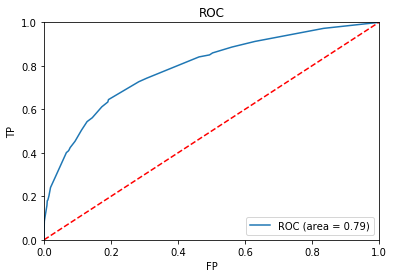

In [131]:
plt.title('ROC')
plt.plot(fpr, tpr, label='ROC (area = %0.2f)' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TP')
plt.xlabel('FP')
plt.show()

# Balanced Tree

In [132]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [133]:
y_train = y_train.astype(int)

In [134]:
y_test = y_test.astype(int)

In [135]:
tree2 = DecisionTreeClassifier(max_depth = 5, random_state = 0, class_weight='balanced')

In [136]:
tree2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [137]:
export_graphviz(tree2, out_file='C:\\Users\\dima2\\OneDrive\\Рабочий стол\\DataAnalysis\\HW4\\Organics_tree2.dot', 
               rounded = True, proportion = False, 
                precision = 2, filled = True)

In [138]:
(graph, ) = pydot.graph_from_dot_file('C://Users//dima2//OneDrive//Рабочий стол//DataAnalysis//HW4//Organics_tree2.dot')

In [139]:
graph.write_png('C://Users//dima2//OneDrive//Рабочий стол//DataAnalysis//HW4//Organics_tree2.png')

Metrics

In [140]:
# Сonfusion matrix
y_pred = tree2.predict(X_test)

In [141]:
confusion_matrix(y_test, y_pred)

array([[3902, 1104],
       [ 571, 1090]], dtype=int64)

In [142]:
# Mean Consequential Error
accuracy_score(y_test, y_pred)

0.7487625618719064

In [143]:
# Recall
recall_score(y_test, y_pred)

0.6562311860325105

In [144]:
# Presicion
precision_score(y_test, y_pred)

0.4968094804010939

In [145]:
# Cohen’s Kappa
cohen_kappa_score(y_test, y_pred)

0.3935080656045189

In [146]:
# F
f1_score(y_test, y_pred)

0.5654993514915695

In [147]:
# Balanced accuracy
balanced_accuracy_score(y_test, y_pred)

0.7178479142307979

In [148]:
# Matthews correlation coefficient
matthews_corrcoef(y_test, y_pred)

0.4010475614616477